In [28]:
import math
import numpy as np
import numpy.random as rd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean
from statistics import variance
from scipy.stats import gaussian_kde
import statistics
import seaborn as sns
import time

In [29]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

In [30]:
# it gives N random numbers from F(x) = 1-expo(-x/theta) distribution
def Exponential_Distribution(N,θ):
#     generating form uniform [0,1]
    U = Uniform_Distribution(34,2**60,17,21,N)
    expo = []
    for i in range(0,N):
#     applying inverse of CDF on unifom [0,1]
        num = -θ*math.log(U[i])
        expo.append(num)
    return expo

In [31]:
def Box_Muller(N):
# generating random theta between 0 to 2*pi
    U = Uniform_Distribution(1, 2**50, 5, 7, N)
    random_theta = []
    for i in range(0,N):
        random_theta.append(U[i]*2*np.pi)

# generating exponential of mean 1
    expo = Exponential_Distribution(N, 1)

# generating N(0,1) 
    out = np.zeros(N)
    for i in range(N):
        theta = random_theta[i]
        E = expo[i]
        X = np.sin(theta)*np.sqrt(2*E)
        out[i] = X
    return out

In [32]:
# calculates output from U1 and R_sq
def f(U1, R_sq):
    return U1*np.sqrt(-2*np.log(R_sq)/R_sq)

def Marsaglia_and_Bray(N):
    rejected_cnt = 0
    
# it is the number of uniform random numbers generated
# to be sufficient for acceptance rejection method
    num = int(1.4*N)
    
# values of a,m,c are choosen so that it can have full period
    U1 = Uniform_Distribution(31, 2**60, 101, 3,num)
    U2 = Uniform_Distribution(19, 2**60, 65, 9,num)
    
# to spread the uniform [0,1] to uniform [-1,1]
    for i in range(num):
        U1[i] = 2 * U1[i] - 1
        U2[i] = 2 * U2[i] - 1
    out = np.zeros(N)
    j = 0
    for i in range(N):
        R_sq = 2
# running loop while R_sq is greater than 1
        while R_sq > 1:
            rejected_cnt = rejected_cnt + 1
            v1 = U1[j]
            v2 = U2[j]
            j = j + 1
            R_sq = v1*v1 + v2*v2

# accepting when we get R_sq < 1
        X = f(v1, R_sq)
        out[i] = X

# subtracting 1 for last accepted value
        rejected_cnt = rejected_cnt - 1
    return rejected_cnt, out

## Question 1(a)

In [33]:
# tracking the computational time, which is used in 2nd answer.
t1 = time.time()

X1 = Box_Muller(10**2)
t2 = time.time()

X2 = Box_Muller(10**4)
t3 = time.time()

# rejected_cnt is used to track proportion of values rejected in 3rd answer. 
rejected_cnt1, X3 = Marsaglia_and_Bray(10**2)
t4 = time.time()

rejected_cnt2, X4 = Marsaglia_and_Bray(10**4)
t5 = time.time()

### Using Box Muller method

In [34]:
print("Mean for 100 samples: ", mean(X1))
print("Variance for 100 samples: ", variance(X1))
print("Mean for 10000 samples: ", mean(X2))
print("Variance for 10000 samples: ", variance(X2))

Mean for 100 samples:  0.014072146149025447
Variance for 100 samples:  1.0866593516752343
Mean for 10000 samples:  0.009768176532079212
Variance for 10000 samples:  1.0091366468766338


### Using Marsaglia and Bray method

In [35]:
print("Mean for 100 samples: ", mean(X3))
print("Variance for 100 samples: ", variance(X3))
print("Mean for 10000 samples: ", mean(X4))
print("Variance for 10000 samples: ", variance(X4))

Mean for 100 samples:  -0.09691163290956603
Variance for 100 samples:  1.0493379196968649
Mean for 10000 samples:  0.02215170882736656
Variance for 10000 samples:  0.9989912742709984


## Question 1(b)

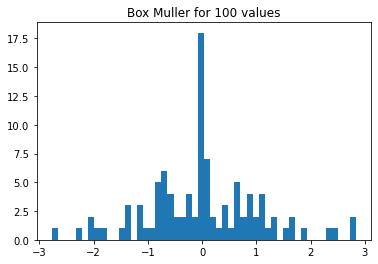

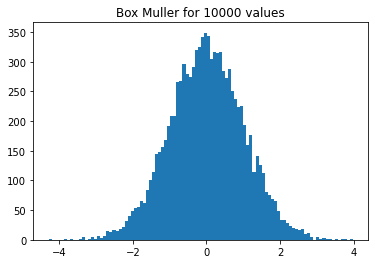

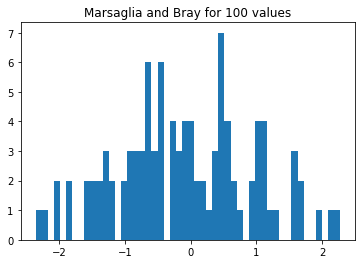

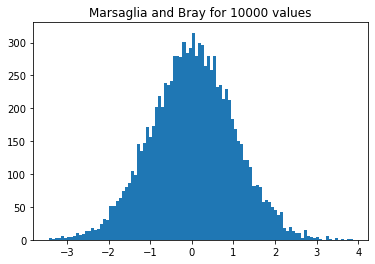

In [44]:
plt.hist(X1, bins=50)
plt.title("Box Muller for 100 values")
plt.show()


plt.hist(X2, bins=100)
plt.title("Box Muller for 10000 values")
plt.show()


plt.hist(X3, bins=50)
plt.title("Marsaglia and Bray for 100 values")
plt.show()


plt.hist(X4, bins=100)
plt.title("Marsaglia and Bray for 10000 values")
plt.show()

## Question 1(c)

### For N(0,5)

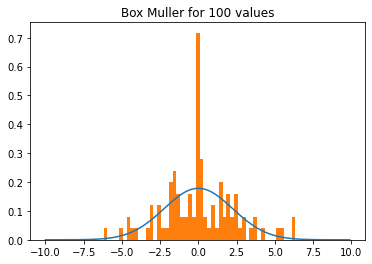

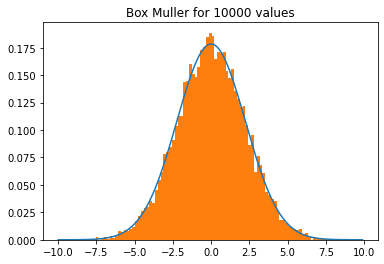

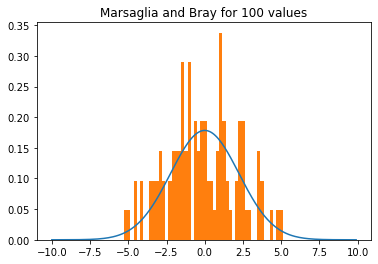

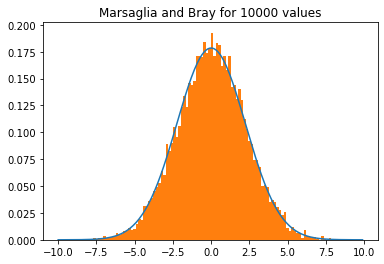

In [47]:
Variance = 5
Mean = 0
Std_Dev = np.sqrt(Variance)
x = np.arange(-10, 10, 0.1)
# for plotting density function from the formula
y = (np.exp((-1*(x-Mean)*(x-Mean))/(2*Variance))) / np.sqrt(2*np.pi*Variance)
xs = np.linspace(-10,10,100)

Y1 = []
Y2 = []
Y3 = []
Y4 = []
# Transforming N(0,1) to N(0,5) 
for i in range(100):
    Y1.append(X1[i]*Std_Dev + Mean)
    Y3.append(X3[i]*Std_Dev + Mean)

for i in range(10000):
    Y2.append(X2[i]*Std_Dev + Mean)
    Y4.append(X4[i]*Std_Dev + Mean)
    
plt.figure()
plt.plot(x,y)
plt.hist(Y1, bins=50, density=True)  
plt.title("Box Muller for 100 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Y2, bins=100, density=True) 
plt.title("Box Muller for 10000 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Y3, bins=50, density=True) 
plt.title("Marsaglia and Bray for 100 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Y4, bins=100, density=True) 
plt.title("Marsaglia and Bray for 10000 values")
plt.show()

### For N(5,5)

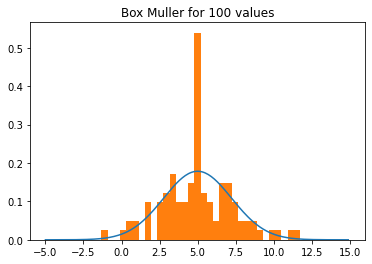

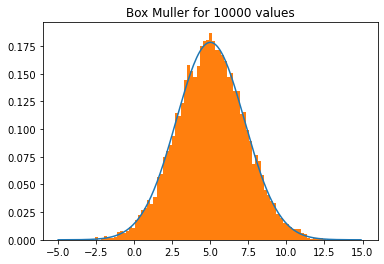

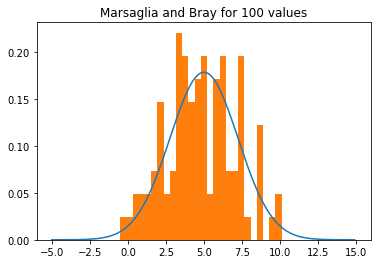

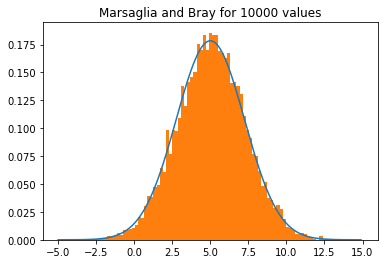

In [48]:
Variance = 5
Mean = 5
Std_Dev = np.sqrt(Variance)
x = np.arange(-5, 15, 0.1)
y = (np.exp((-1*(x-Mean)*(x-Mean))/(2*Variance))) / np.sqrt(2*np.pi*Variance)
xs = np.linspace(-5,15,100)

Z1 = []
Z2 = []
Z3 = []
Z4 = []
for i in range(100):
    Z1.append(X1[i]*Std_Dev + Mean)
    Z3.append(X3[i]*Std_Dev + Mean)

for i in range(10000):
    Z2.append(X2[i]*Std_Dev + Mean)
    Z4.append(X4[i]*Std_Dev + Mean)
    
plt.figure()
plt.plot(x,y)
plt.hist(Z1, bins=np.linspace(-5, 15, 50), density=True)  
plt.title("Box Muller for 100 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Z2, bins=np.linspace(-5, 15, 100), density=True)  
plt.title("Box Muller for 10000 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Z3, bins=np.linspace(-5, 15, 50), density=True)  
plt.title("Marsaglia and Bray for 100 values")
plt.show()

plt.figure()
plt.plot(x,y)
plt.hist(Z4, bins=np.linspace(-5, 15, 100), density=True)  
plt.title("Marsaglia and Bray for 10000 values")
plt.show()

## Question 2

### For sample of 100 values

In [39]:
print(f"Total runtime for Box-Muller {(t2 - t1)*(10**6)} microseconds")
print(f"Total runtime for Marsaglia and Bray {(t4 - t3)*(10**6)} microseconds")

Total runtime for Box-Muller 0.0 microseconds
Total runtime for Marsaglia and Bray 999.9275207519531 microseconds


### For sample of 10000 values

In [40]:
print(f"Total runtime for Box-Muller is {(t3 - t2)*(10**6)} microseconds")
print(f"Total runtime for Marsaglia and Bray is {(t5 - t4)*(10**6)} microseconds")

Total runtime for Box-Muller is 48994.30274963379 microseconds
Total runtime for Marsaglia and Bray is 65000.77247619629 microseconds


#### Marsaglia and Bray takes more time than Box-Muller. Therefore, we can say that calculating sin, cos in Box-muller is a faster computation than using acceptance-rejection method in Marsaglia and Bray.

## Question 3

In [41]:
print(f"Ratio of values rejected for N = 100 is {rejected_cnt1/(100+rejected_cnt1)}")
print(f"Ratio of values rejected for N = 10000 is {rejected_cnt2/(10000+rejected_cnt2)}")

Ratio of values rejected for N = 100 is 0.2647058823529412
Ratio of values rejected for N = 10000 is 0.21764982005945863


In [42]:
print(1-(np.pi/4))

0.21460183660255172


#### The ratio for sample with 10000 values is very close to (1-pi/4)